In [1]:
%%capture
%reload_ext autoreload
%autoreload 2
from codedetails import *

In [2]:
load_pretrained_slim_model ()

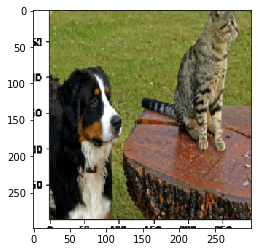

In [3]:
# You can edit the location and filename of the input test image here
image = transform_image_for_inception("./dogs.png")

# Display test Image
display_image (image)

In [4]:
print_top_predictions_for_image(image)


240 Bernese mountain dog 0.73193145
242 EntleBucher 0.03632724
241 Appenzeller 0.033322193
239 Greater Swiss Mountain dog 0.019685516
286 Egyptian cat 0.0020244487


# Using LIME to test the model (i.e., generate explanations)

In [ ]:
process_image_by_lime(image)

### Image parts supporting the top prediction (i.e., _Bernese mountain dog_)

In [ ]:
show_lime_explanations_for_object(top=1)

In [ ]:
show_lime_explanations_for_object(top=2)

In [ ]:
show_lime_explanations_for_object(top=3)

In [ ]:
show_lime_explanations_for_object(top=4)

### Image parts supprting the prediction _Egyptian cat_

In [ ]:
show_lime_explanations_for_object (top = 5)